# EDA STROKE ICTUS

### ESTUDIO DE ICTUS 

In [1]:
# Librerías estándar de análisis de datos
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
#Mensaje de bienvenida
print("¡Hola! Introduce los datos del nuevo paciente")

#Escribimos genero
gender = input("Por favor ingrese el genero del paciente (Male/Female): ")

#Escribimos work_type
work_type = input("\nPor favor ingrese el tipo de trabajo(Private/Self-employed/Govt_job/children): \n")

##Leemos Residence_type
residence_type = input("\nPor favor ingrese el tipo de residencia(Urban/Rural): \n")

##Leemos smoking_status
smoking_status = input("\nPor favor ingrese el tipo de fumador(formerly smoked/never smoked/smokes/Unknown): \n")

##Leemos age
age = input("\nPor favor ingrese la edad del pàciente: \n")

##Leemos hypertension
hypertension = input("\nPor favor ingrese la hipertension(1 or 0): \n")

##Leemos heart_disease
heart_disease = input("\nPor favor ingrese si esta enfermo del corazón(1 or 0): \n")

##Leemos avg_glucose_level
avg_glucose_level = input("\nPor favor ingrese nivel medio de glucosa: \n")

##Leemos avg_glucose_level
bmi = input("\nPor favor ingrese el BMI (Base Muscle Index): \n")

#Age será un entero o binario (0 ó 1)
age = int(age)
#BMI, avg_glucose_level será un real, así que usamos float()
bmi = float(bmi)
avg_glucose_level = float(avg_glucose_level)
#Bool
heart_disease = int(heart_disease)
hypertension = int(hypertension)

list_variables_predictoras = [[gender, age, hypertension, heart_disease, work_type, residence_type, avg_glucose_level, bmi, smoking_status]]

list_variables_predictoras

#Llamo a mi funcion predictora
#predict(variables_predictoras)

list_variables_predictoras

columns = ['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
df_nuevo= pd.DataFrame(list_variables_predictoras, columns = columns)


¡Hola! Introduce los datos del nuevo paciente


In [3]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./stroke_dataset.csv"
#===============================================
# Importamos el dataset
df = pd.read_csv(path_to_data)

#### VARIABLES DECLARADAS
<ul><li><b>gender</b> : género
<li><b>age</b> : edad</li>
<li><b>hypertension</b> : hipertensión</li>
<li><b>heart_disease</b> : enfermo del corazón</li>
<li><b>ever_married</b> : alguna vez casada</li>
<li><b>work_type</b> : funcionaria, autónoma, empresa privada, niños </li>
<li><b>Residence_type</b> : Tipo de residencia, rural o urbano</li>
<li><b>avg_glucose_level</b> : porcentaje de glucosa </li> 
<li><b>bmi</b> : índice de masa corporal.</li>
<li><b>smoking_status</b> : hábito de fumar</li> 
<li><b>stroke</b> : ictus</li>
</ul>    

In [4]:
# VISUALIZAMOS LAS 5 PRIMERAS FILAS
#===============================================
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
# VISUALIZAMOS LAS 5 ÚLTIMAS FILAS
#===============================================
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [6]:
#CONTAMOS FILAS Y COLUMNAS
#===============================================
df.shape

(4981, 11)

##### 4981 FILAS y 11 COLUMNAS

In [7]:
# INFORMACIÓN DEL DATASET 
#===============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## OJO!!! 

In [8]:
# PASAMOS A BOLEANOS LAS SIGUIENTES VARIABLES PARA MEJOR TRATAMIENTO DE LOS DATOS
# =============================================
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)
# OTRA FORMA DE HACERLO QUE DEBERÍA FUNCIONAR TAMBIÉN 
# =============================================
# df[["stroke", "hypertension", "heart_disease"]].astype(bool)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


In [10]:
# PARA VER BALANCEO DE LA VARIABLE TARGET STROKE
df["stroke"].value_counts()

False    4733
True      248
Name: stroke, dtype: int64

##### LA VARIABLE ESTÁ MUY DESEQUILIBRADA

In [11]:
#VISUALIZACIÓN DE NULOS TOTALES EN CADA VARIABLE
#===============================================
df.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### NI UN SOLO VALOR PERDIDO

In [12]:
# ANÁLISIS ESTADÍSTICO BÁSICO
#===============================================
df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [13]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease", "stroke"]
numericas = ["age", "avg_glucose_level", "bmi"]

Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [14]:
df[categoricas].describe()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
count,4981,4981,4981,4981,4981,4981,4981,4981
unique,2,2,4,2,4,2,2,2
top,Female,Yes,Private,Urban,never smoked,False,False,False
freq,2907,3280,2860,2532,1838,4502,4706,4733


In [15]:
#CONTEO DE VALORES EN LAS VARIABLES CATEGÓRICAS
#===============================================
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
Female    2907
Male      2074
Name: gender, dtype: int64

Column name: ever_married
Yes    3280
No     1701
Name: ever_married, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

Column name: hypertension
False    4502
True      479
Name: hypertension, dtype: int64

Column name: heart_disease
False    4706
True      275
Name: heart_disease, dtype: int64

Column name: stroke
False    4733
True      248
Name: stroke, dtype: int64



In [16]:
#DATOS DUPLICADOS 
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

<h2> GRÁFICOS RELEVANTES</h2>
    

In [17]:
#PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES
#===============================================
#pd.plotting.scatter_matrix(df[numericas], figsize=(12,10))

In [18]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


In [19]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
#===============================================
##sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot: >

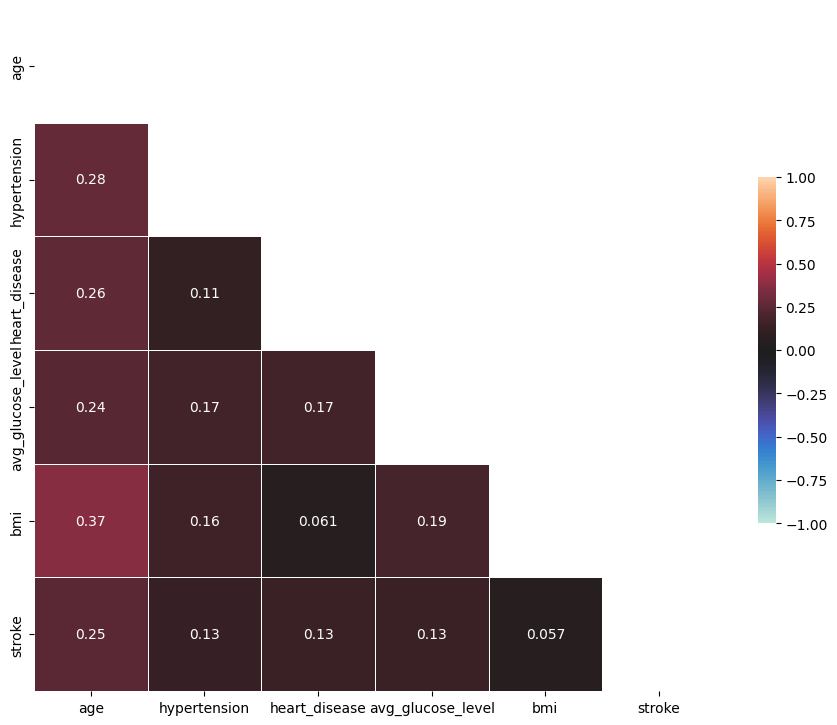

In [20]:
# Ahora igual pero más bonito
#===========================================================================
# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### BAJA CORRELACIÓN ENTRE LAS VARIABLES COMO TAMBIÉN HABÍAMOS APRECIADO EN LA TABLA Y GRÁFICO ANTERIOR.

In [21]:
# HISTOGRAMAS DE LAS VARIABLES NUMÉRICAS PARA VER SUS DISTRIBUCIONES
##df[numericas].hist(bins=50, figsize=(20,15))

##### LAS VARIABLES AGE, AVG_GLUCOSE_LEVEL Y BMI TIENEN DISTRIBUCIONES NORMALES

In [22]:
##sns.histplot(data=df, x="age", kde=True)

In [23]:
##sns.histplot(data=df, x="avg_glucose_level", kde=True)

In [24]:
##sns.histplot(data=df, x="bmi", kde=True)

In [25]:
# Observamos los outlers de las variables numéricas
# =======================================================
##sns.boxplot(data=df)
##plt.xticks(rotation=90)
##plt.show()

In [26]:
#Comprobar cuántos valores perdemos si nos quedamos con menores de 45 en bmi
# ===================================================================
len(df[df["bmi"]>45])

65

In [27]:
# VISUALIZAMOS LAS VARIABLES
#sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

## OJO!!!! REVISAR ESTA VARIABLE POR SI EL MODELO NO FUESE CORRECTO

In [28]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
##df["bmi"].skew()
##sns.boxplot(x=df["bmi"])

In [29]:
# VISUALIZACIÓN DE LA VARIABLE AGE
# =======================================================
##df["age"].skew()
##sns.boxplot(x=df["age"])

In [30]:
# VISUALIZACIÓN DE LA VARIABLE avg_glucose_level
# =======================================================
##df["avg_glucose_level"].skew()
##sns.boxplot(x=df["avg_glucose_level"])

In [31]:
##sns.boxplot(x= df[(df["avg_glucose_level"]<165 )]["avg_glucose_level"])

## INGENIERÍA DE CARACTERÍSTICAS

In [32]:
# Aplicamos logaritmo en base 10 
log_glucose = np.log(df["avg_glucose_level"])
#Crea columna log_price

#df["avg_glucose_level"] = log_glucose
#sns.histplot(x=log_glucose, kde=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


In [33]:
## se elimina variable objetivo, por que es la que queremos predecir
X = df.drop("stroke", axis=1)
y = df["stroke"]
X.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,False,True,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,False,True,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,False,False,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,True,False,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,False,False,Yes,Private,Urban,186.21,29.0,formerly smoked


In [34]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: stroke, dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 326.0+ KB


In [36]:
## Reescribimos variables, esta vez sin el target TODO: Filtro
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
#numericas = ["age", "avg_glucose_level", "bmi"]

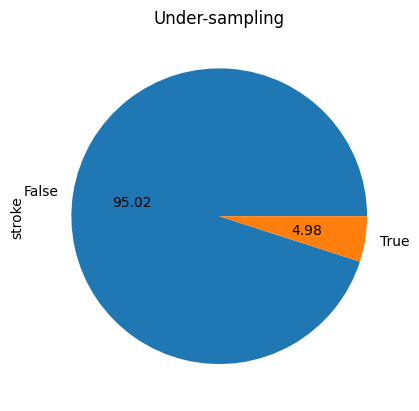

In [37]:
## Sin equilibrar
ax = y.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling") 

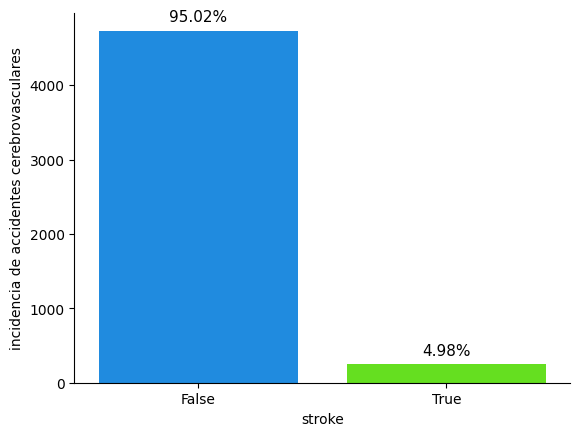

In [38]:
ax = sns.countplot(x="stroke",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

## Balancemos

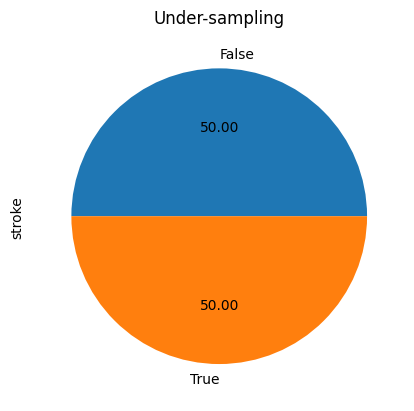

In [39]:
## BALANCEO
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Float
# rus = RandomUnderSampler(sampling_strategy= not minority) # String
X_res, y_res = rus.fit_resample(X,y)

X = X_res
y = y_res

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling") 

## Escalado de Datos a Z

In [40]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [41]:
X = transformer.fit_transform(X)

file = open('transformer_entrenado.pkl', 'wb')
pickle.dump(transformer, file)  
file.close()

In [42]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())


,transformer_numerico__age,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_Female,transformer_categorico__gender_Male,transformer_categorico__ever_married_No,transformer_categorico__ever_married_Yes,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,...,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__hypertension_False,transformer_categorico__hypertension_True,transformer_categorico__heart_disease_False,transformer_categorico__heart_disease_True
0,0.645303,0.137647,0.410180,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.633072,0.081396,0.290419,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.547456,0.243309,0.652695,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.804305,0.114213,0.494012,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.620841,0.849965,0.583832,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.963307,0.274463,0.350299,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
492,0.902153,0.516478,0.395210,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
493,0.926614,0.667761,0.485030,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
494,0.902153,0.025838,0.377246,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## entrenamiento

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

In [44]:
#Algoritmos de clasificación

#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import RandomForestClassifier


In [45]:
#Métricas de los algoritmos

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import pickle

In [46]:
def train_evaluate(nombre_modelo, modelo):
        
    mod = modelo()
    mod.fit(X_train, y_train)
    y_predict = mod.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    confusionmatrix = confusion_matrix(y_test, y_predict)
    
    y_pred_train = mod.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    confusionmatrix_train = confusion_matrix(y_train, y_pred_train)
    
    print(nombre_modelo)
    print()
    print(f"Accuracy: {accuracy}")
    print(f"RocAUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"ConfusionMatrix: {confusionmatrix}")
       
    print(nombre_modelo)
    print()
    print(f"Accuracy_train: {accuracy_train}")
    print(f"RocAUC_train: {auc_train}")
    print(f"Recall_train: {recall_train}")
    print(f"Precision_train: {precision_train}")
    print(f"ConfusionMatrix_train: {confusionmatrix_train}")
    print(f"\nError: ", accuracy - accuracy_train) 

    fig1, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confusionmatrix_train, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(confusionmatrix_train.shape[0]):
        for j in range(confusionmatrix_train.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix_train[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
# guardarmos los datos
    guardar(mod)

In [47]:
def guardar(datos):
    
    print('<-------------------Guardando----------------------->')     
    file = open('modelo_entrenado.pkl', 'wb')
    
    pickle.dump(datos, file)
    
    file.close()
    print('\n')

LogisticRegression

Accuracy: 0.7046979865771812
RocAUC: 0.7130434782608697
Recall: 0.8260869565217391
Precision: 0.6404494382022472
ConfusionMatrix: [[48 32]
 [12 57]]
LogisticRegression

Accuracy_train: 0.7982708933717579
RocAUC_train: 0.7966048151104017
Recall_train: 0.8491620111731844
Precision_train: 0.7794871794871795
ConfusionMatrix_train: [[125  43]
 [ 27 152]]

Error:  -0.09357290679457675


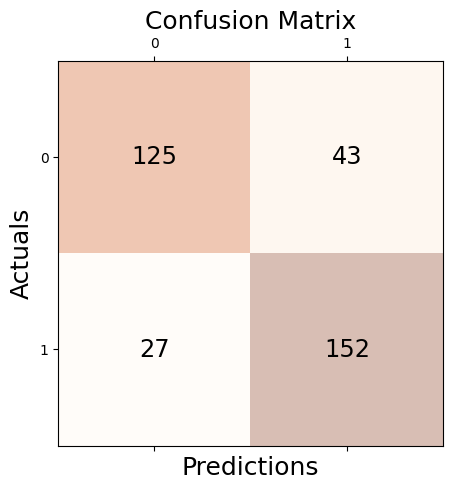

<-------------------Guardando----------------------->




In [48]:
train_evaluate("LogisticRegression", LogisticRegression)


In [49]:
df_nuevo

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,1,1,1,Private,Urban,1.0,1.0,smokrs


In [50]:
# Creamos el fichero submission.csv
pres = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Transported': df_nuevo['Transported']})
pres.to_csv('submission.csv', index=False)
pres.head()

NameError: name 'test_df' is not defined

In [ ]:
def carga():
    file = open('modelo_entrenado.pkl', 'rb')

    data = pickle.load(file)

    print("showing data pickled")
    print(data)

    for i in data:
        print(i)
        
    file.close()  